# Data Analysis With Python

## Objetivos

Luego de completar esta lab seras capas de :
 - Explorar atributos y caracteristicas para predecir el precio del automóvil.

## Tabla de Contenidos

- 1. Importar información desde un Módulo
- 2. Analizar patrones individuales de atributos usando Visualización
- 3. Análisis estadístico descriptivos
- 4. Agrupamiento Básico
- 5. Correlacionismo y Coincidencia
- 6. ANOVA

### ¿Cuales son las principales caracteristicas que tienen mayor impacto en el precio del auto?

## 1. Importa la información desde el módulo 2

### Preparación
importa las librerías

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

Carga la información almacenada en df:

In [3]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [4]:
df = pd.read_csv(filename, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analiza patrones de atributos individuales usando visualización

para instalar `Seaborn` usamos pip, el manejador de paquetes de Python.

Importa los paquetes de visualización `"Matplotlib"` y `"Seaborn"`.No olvides '%matplotlib inline' para gráficar en un cuaderno Jupyter".

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

## ¿Como escoger el método correcto de visualización?

Cuando visualizas variables individuales, es importante primero entender con que tipo de variables estas tratando. Esto nos ayudara a encontrar el método de visualización correcta para esa variable.

In [6]:
# lista el tipo de dato para cada columna

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

## Pregunta #1:
**Cual es el tipo de información para la columna "peak-rpm"**

In [7]:
# Escribe tu código acá abajo
df["peak-rpm"].dtype

dtype('float64')

Por ejemplo, podemos calcular la correlación entre variables de tipo "int64" o "float64 usando el método "corr".

In [9]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

Los elementos diagonales son siempre uno; estudiaremos correlación mas precisamente Pearson correlation al final del notebook.

## Pregunta #2:

**Encuentra la correlación entre las siguiente columnas: bore, stroke, compression-ratio y horsepower.**

Pista: si deseas seleccionas esas columnas, usa la siguiente sintaxis: df[["bore", "stroke", "compression-ratio", "horsepower"]]

In [11]:
df[["bore", "stroke", "compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Variables  Numéricas continuas:

Variables numéricas continuas son variables que puede contener cualquier valor en cierto rango. EEllas pueden ser de tipo "int64" o "float64". Una gran manera de visualizar estas variables es usar gráficos de dispersión(scatterplots) con lineas ajustadas (fitted lines).

Para comenzar a entender la relación (lineal) entre una variable individual y el precio, podemos usar `"regplot"` el cual gráfica gráficos de dispersion mas lineas ajustadas para cada información.

Veamos varios ejemplos de diferentes relaciones lineales:

## Relación Lineal Positiva (Positive Linear relationship)

Veamos el gráfico de dispersion de "engine-size" y "price"

(0.0, 53361.61394916265)

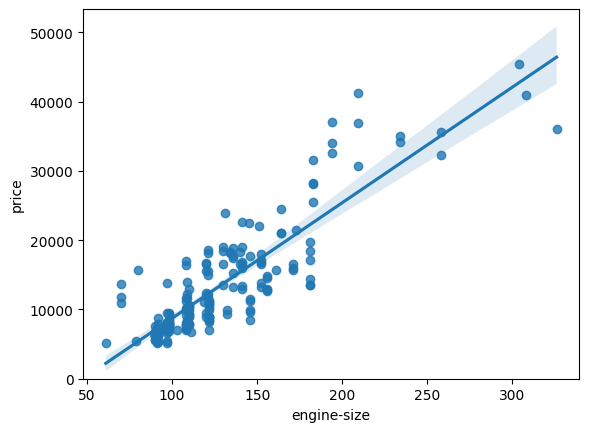

In [12]:
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

Mientras que el tamaño de motor aumenta, el precio también aumenta: esto indica una correlación positiva entre estas variables. El tamaño del motor pare ser un buen indicador de precio dado que la regresión lineal es casi una linea diagonal perfecta.

Podemos examinar la correlación entre "engine-size" y precio y ver que es aproximadamente 0.87.

In [13]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


"highway-mpg" es un potencial predictor de la variable precio. Vamos a ver el gráfico de dispersion de "highway-mpg" y "price".

<Axes: xlabel='highway-mpg', ylabel='price'>

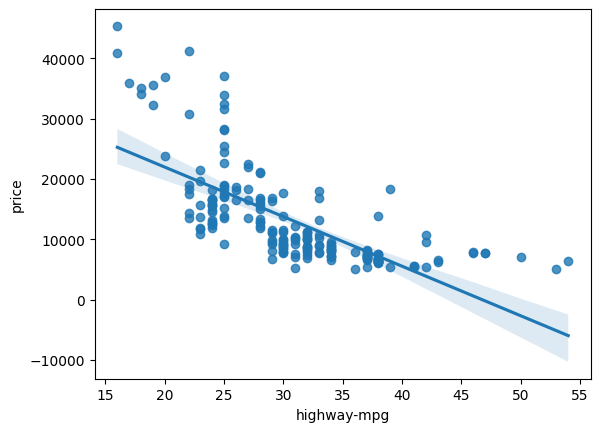

In [14]:
sns.regplot(x="highway-mpg",y="price",data=df)

Mientras highway-mpg sube, el precio baja: esto indica una relación inversa/negativa entre estas dos variables. Highway mpg puede potencialmente ser un predictor de precio.

Podemos examinar la correlación entre "highway-mpg" y precio y ver que es aproximadamente -0.704.

In [15]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## Relación lineal Débil (Weak Linear Relationship)

Veamos si "peak-rpm" es una variable predictora de "price"

<Axes: xlabel='peak-rpm', ylabel='price'>

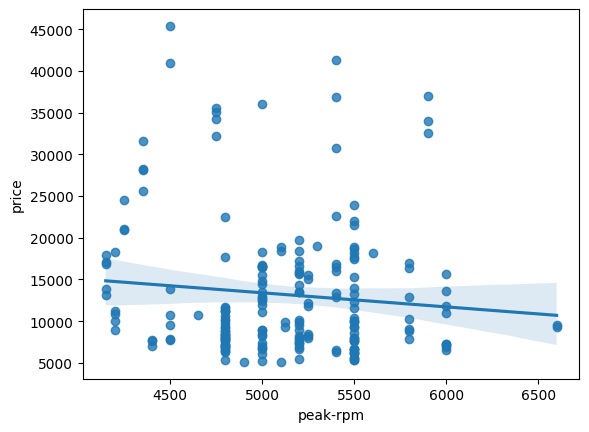

In [16]:
sns.regplot(x="peak-rpm",y="price",data=df)

Peak rpm no parece ser un buen predictor dado que la regresión lineal es cercana a ser horizontal. Ademas los puntos de información se encuentran bastante dispersos y lejos de la linea de ajuste, mostrando mucha variabilidad. Es por esto, que no es una variable confiable.

Podemos examinar la correlación entre "peak-rpm" y precio es aproximadamente -0.101616.

In [17]:
df[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## Pregunta #3 a):

**Encuentra la correlación entre x="stroke" y y="price".**

**Pista: Si deseas seleccionar esas columnas usa la siguiente sintaxis: df[["stroke","price"]]**

In [18]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


## Pregunta #3 b):

**Dada la correlación resultante entre "price" y " stroke", esperas una relación lineal?**

**verifica tu resultado usando la función "regplot()"**

<Axes: xlabel='stroke', ylabel='price'>

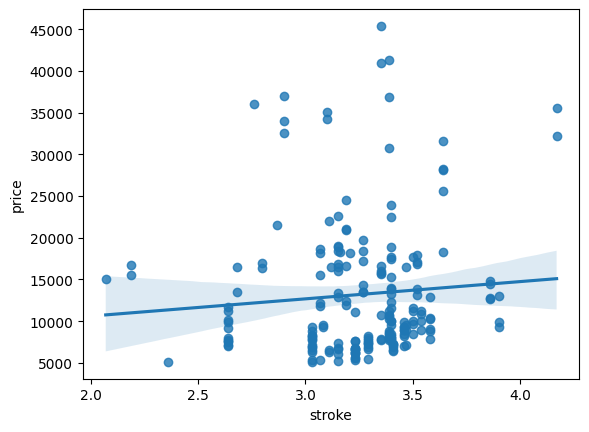

In [19]:
sns.regplot(x="stroke",y="price",data=df)

## Variables Categóricas (Categorical Variables)

Estas son variables que describen una "característica" de una unidad de información, y son seleccionadas de un grupo pequeño de categorías. Las variables categóricas son de tipo "object" o "int64". Una buena manera de visualizar una variable categórica es usando un gráfico de caja (Boxplots).

Veamos la relación entre "body-style" y "precio".

<Axes: xlabel='body-style', ylabel='price'>

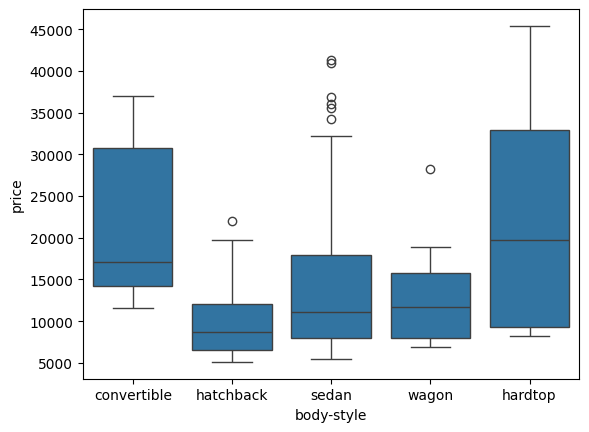

In [20]:
sns.boxplot(x="body-style", y="price",data=df)

Vemos que las distribuciones de precio en las diferentes categorías de body-style tienen una superposición significativa, por lo que "body-style" no sería un buen predictor de "price". 

Examinemos el motor "engine-location" y "price"

<Axes: xlabel='engine-location', ylabel='price'>

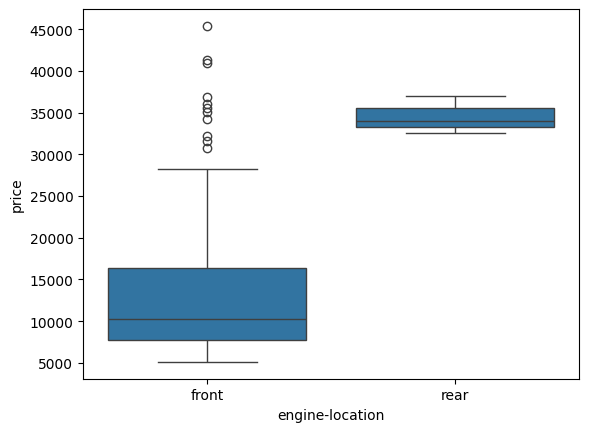

In [21]:
sns.boxplot(x="engine-location", y="price",data=df)

Acá vemos la distribución de precio entre las dos categorías de engine-location, front y rear, son lo suficientemente distintas para ser un potencial buen predictor de "price".

Examinemos "drive-wheels" y "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

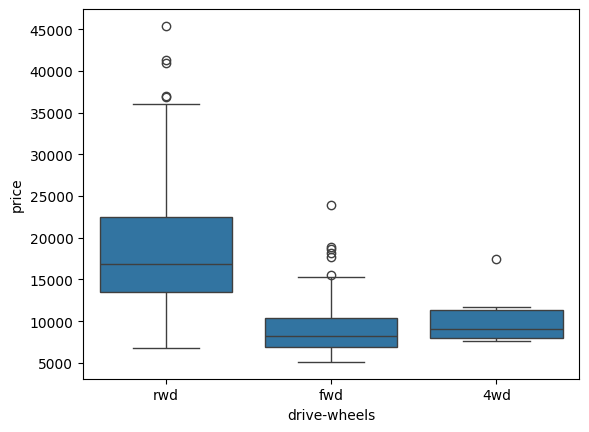

In [22]:
sns.boxplot(x="drive-wheels",y="price",data=df)

Podemos ver que la distribución de precio entre las diferentes categorías de drive-wheels difiere. Como resultado., drive-wheels puede potencialmente ser un predictor de price.

## 3. Análisis Estadístico Descriptivo

Veamos primero las variables utilizando un método descriptivo.

La función **describe** automáticamente computa estadísticas básicas para todas las variables continuas. Cualquier valor NaN es saltado de forma automática en estas estadísticas.

Esto te mostrara:

 - El conteo de esa variable
 - La media (promedio)(mean)
 - La desviación estándar (std)
 - El valor mínimo
 - El IQR (Interquartile Range: 25%,50%,75%), que es la diferencia entre el tercer y el primer cuartil
 - El valor máximo

Podemos aplicar el método "describe" de la siguiente manera:

In [23]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000
